In [44]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
import pandas as pd
import anndata as adata
from matplotlib import pyplot as plt

import seaborn as sns

import os

In [25]:
genes_df = pd.read_csv("./data/atac_data/genes_atac.tsv", sep='\t')
atac_df = pd.read_csv("./data/atac_data/matrix_atac.tsv", sep='\t')
barcodes_df = pd.read_csv("./data/atac_data/barcodes_atac.tsv", sep='\t')

In [62]:
atac_df.head(100)
df = atac_df.iloc[:, 1:]
#atac_df.describe()
df.head(100)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.349844,0.744676,-0.876536,-0.876536,0.563343,1.348053,1.230084,-0.876536,-0.876536,-0.876536,...,0.402362,0.384516,-0.876536,0.684424,-0.876536,-0.876536,-0.876536,1.309321,0.719594,1.211556
96,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,...,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289
97,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,...,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057
98,-0.667272,-0.667272,2.404169,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,...,-0.667272,0.799157,-0.667272,-0.667272,-0.667272,-0.667272,2.143346,-0.667272,-0.667272,-0.667272


In [74]:

#vals = nparratac_df.loc[1]
#sns.violinplot(data=df[0:1])

#plt.scatter(x=atac_df.loc[1], y=atac_df.loc[2])

In [86]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.plot


In [83]:
#sklearn.decomposition.KernelPCA(atac_df)

#pca = PCA(n_components=1)
#pca.fit(df)
#pca_data = pca.transform(df)


In [89]:
reducer = umap.UMAP()

umap_data = df.values
scaled_data = StandardScaler().fit_transform(umap_data)

embedding = reducer.fit_transform(scaled_data)
embedding.shape

(1000, 2)

Text(0.5, 1.0, 'UMAP projection of ATAC data')

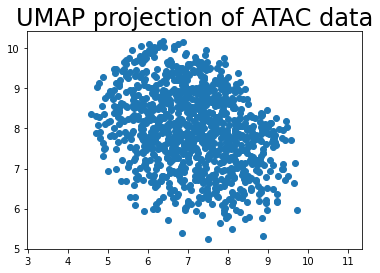

In [93]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    )
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of ATAC data', fontsize=24)

In [79]:
df.head(100)
#mapper = umap.UMAP().fit(df.values)
#umap.plot.points(mapper)

,AAACAGCCAATCCCTT-1,AAACAGCCAATGCGCT-1,AAACAGCCACCAACCG-1,AAACAGCCAGGATAAC-1,AAACAGCCAGTAGGTG-1,AAACAGCCAGTTTACG-1,AAACAGCCATCCAGGT-1,AAACATGCAAGGTCCT-1,AAACATGCACCGGCTA-1,AAACATGCACTTGTTC-1,...,TTTGTGTTCGATAACC-1,TTTGTGTTCGGGACCT-1,TTTGTGTTCGTCAAGT-1,TTTGTGTTCTCCATAT-1,TTTGTTGGTCAGGAAG-1,TTTGTTGGTGACATGC-1,TTTGTTGGTGTTAAAC-1,TTTGTTGGTTAGGATT-1,TTTGTTGGTTGGTTAG-1,TTTGTTGGTTTGCAGA-1
0,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,...,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744,-0.075744
1,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,...,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420,-0.116420
2,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,...,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548,-0.062548
3,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,...,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238,-0.092238
4,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,...,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971,-0.076971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.349844,0.744676,-0.876536,-0.876536,0.563343,1.348053,1.230084,-0.876536,-0.876536,-0.876536,...,0.402362,0.384516,-0.876536,0.684424,-0.876536,-0.876536,-0.876536,1.309321,0.719594,1.211556
96,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,...,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289
97,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,...,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057,-0.079057
98,-0.667272,-0.667272,2.404169,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,-0.667272,...,-0.667272,0.799157,-0.667272,-0.667272,-0.667272,-0.667272,2.143346,-0.667272,-0.667272,-0.667272
